In [176]:
!pip install seaborn

In [177]:
#Library
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
!pip install Jinja2

In [179]:
#Import Dataset
df = pd.read_csv(r"C:\Users\GF63\Downloads\ALP_Project\Dataset_Terapi_Kelenjar_Getah_Bening.csv")
df

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
85,2,51,4.00,1.0,1.0,65,7.0,1
86,2,51,6.00,6.0,NaN,80,2.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1
88,2,53,10.00,1.0,2.0,30,25.0,1


In [180]:
df.duplicated().sum()

0

In [181]:
df.isna().sum()

gender                 0
age                    0
Time                   3
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

In [182]:
#Regression for inputting Missing Time Value
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\GF63\AppData\Local\Temp\ipykernel_12056\3423807376.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
gender,1.00,0.04,-0.01,0.11,-0.08,-0.12,0.01,0.02
age,0.04,1.00,0.19,0.00,-0.04,-0.06,-0.02,-0.19
Time,-0.01,0.19,1.00,0.04,-0.27,-0.05,-0.20,-0.36
Number_of_Warts,0.11,0.00,0.04,1.00,0.16,-0.11,0.08,-0.04
Type,-0.08,-0.04,-0.27,0.16,1.00,-0.06,0.19,0.09
Area,-0.12,-0.06,-0.05,-0.11,-0.06,1.00,0.12,0.04
induration_diameter,0.01,-0.02,-0.20,0.08,0.19,0.12,1.00,-0.03
Result_of_Treatment,0.02,-0.19,-0.36,-0.04,0.09,0.04,-0.03,1.00


# Using Age Because Correlation with age is the highest

In [183]:
df_nv = df.dropna(axis=0,subset=['Time','age'])
df_nv = df_nv.loc[:, ['Time','age']]
missing_time = df["Time"].isnull()
age_mistime = pd.DataFrame(df['age'][missing_time])

In [184]:
X = df_nv[['age']]
y = df_nv['Time']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=101)

from sklearn.linear_model import LinearRegression

y_train.shape
lm = LinearRegression()
lm.fit(X_train,y_train)

time_pred = lm.predict(age_mistime)
n = np.round(time_pred,2)


In [185]:
df[df['Time'].isna()]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
43,1,38,NaN,8.0,2.0,56,45.0,1
50,1,54,NaN,13.0,3.0,43,5.0,1
72,2,28,NaN,4.0,1.0,9,2.0,1


In [186]:
misval = df['Time'].isna()
df.loc[misval,'Time'] = n

In [187]:
df.iloc[[43,50,72]]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
43,1,38,7.44,8.0,2.0,56,45.0,1
50,1,54,8.47,13.0,3.0,43,5.0,1
72,2,28,6.80,4.0,1.0,9,2.0,1


In [188]:
df.isna().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

In [189]:
df

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
85,2,51,4.00,1.0,1.0,65,7.0,1
86,2,51,6.00,6.0,NaN,80,2.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1
88,2,53,10.00,1.0,2.0,30,25.0,1


In [190]:
df[df['Number_of_Warts'].isna()]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
1,1,27,11.75,NaN,1.0,208,6.0,0


# Using Mode

In [191]:
df['Number_of_Warts'] = df['Number_of_Warts'].fillna(df['Number_of_Warts'].mode()[0])
df

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,2.0,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
85,2,51,4.00,1.0,1.0,65,7.0,1
86,2,51,6.00,6.0,NaN,80,2.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1
88,2,53,10.00,1.0,2.0,30,25.0,1


In [192]:
df[df['induration_diameter'].isna()]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
19,1,15,4.0,4.0,3.0,25,NaN,1
53,2,15,6.5,19.0,1.0,56,NaN,1


# Using Mean

In [193]:
df['induration_diameter'] = df['induration_diameter'].fillna(df['induration_diameter'].mean())
df

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,2.0,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
85,2,51,4.00,1.0,1.0,65,7.0,1
86,2,51,6.00,6.0,NaN,80,2.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1
88,2,53,10.00,1.0,2.0,30,25.0,1


In [194]:
df.iloc[[19,53]]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
19,1,15,4.0,4.0,3.0,25,14.5,1
53,2,15,6.5,19.0,1.0,56,14.5,1


In [195]:
df.isna().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        0
Type                   5
Area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64

## Using induration diameter because Correlation with induration diameter is the Highest

In [196]:
df_nn = df.dropna(axis=0,subset=['Type','induration_diameter'])
df_nn = df_nn.loc[:, ['Type','induration_diameter']]
no_type = df["Type"].isnull()
indu_type = pd.DataFrame(df['induration_diameter'][no_type])

In [197]:
X = df_nn[['induration_diameter']]
y = df_nn['Type']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=101)

from sklearn.linear_model import LinearRegression

y_train.shape
lm = LinearRegression()
lm.fit(X_train,y_train)

time_pred = lm.predict(indu_type)
n = np.round(time_pred,0)
n

array([2., 2., 2., 2., 2.])

In [198]:
df[df['Type'].isna()]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
10,2,26,10.50,6.0,NaN,50,9.0,0
26,1,20,8.00,6.0,NaN,45,8.0,1
66,2,23,6.75,6.0,NaN,19,2.0,1
86,2,51,6.00,6.0,NaN,80,2.0,1
89,2,53,7.25,6.0,NaN,81,7.0,1


In [199]:
misvalue = df['Type'].isna()
df.loc[misvalue,'Type'] = n

In [200]:
df.iloc[[10,26,66,86,89]]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
10,2,26,10.50,6.0,2.0,50,9.0,0
26,1,20,8.00,6.0,2.0,45,8.0,1
66,2,23,6.75,6.0,2.0,19,2.0,1
86,2,51,6.00,6.0,2.0,80,2.0,1
89,2,53,7.25,6.0,2.0,81,7.0,1


# Melakukan OverSampling dengan metode SMOTE

<AxesSubplot: xlabel='Result_of_Treatment', ylabel='Count'>

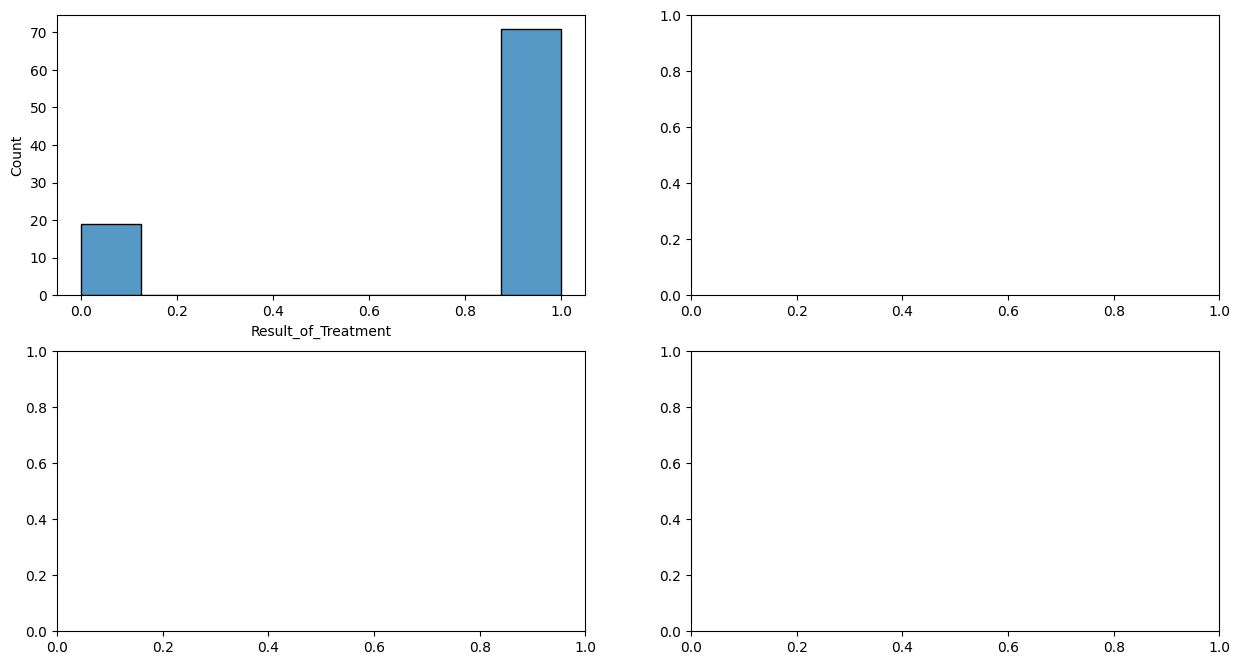

In [201]:
fig,axes = plt.subplots(2,2,figsize=(15,8))
sns.histplot(data=df,x='Result_of_Treatment',ax=axes[0,0])

In [203]:
from imblearn.over_sampling import SMOTE 
x = df.drop(['Result_of_Treatment'],axis=1)
y = df['Result_of_Treatment']

In [204]:
sm = SMOTE(random_state=30)
x_sampling , y_sampling = sm.fit_resample(x,y)

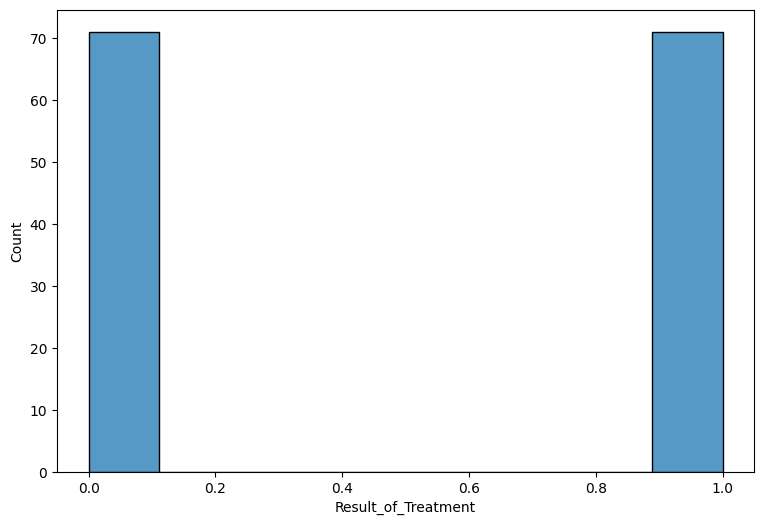

In [205]:
fig = plt.subplots(figsize=(9,6))
sns.histplot(data=y_sampling)
plt.show()